In [82]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


In [83]:
df_bolly=pd.read_csv("/content/sample_data/bollywood.csv")
df_prod=pd.read_csv("/content/sample_data/bollywoodmovies.csv")
df_bolly.head(65)


,SlNo,Release Date,MovieName,ReleaseTime,Genre,Budget,BoxOfficeCollection,YoutubeViews,YoutubeLikes,YoutubeDislikes
0,1,18-Apr-14,2 States,LW,Romance,36,104.00,8576361,26622,2527
1,2,04-Jan-13,Table No. 21,N,Thriller,10,12.00,1087320,1129,137
2,3,18-Jul-14,Amit Sahni Ki List,N,Comedy,10,4.00,572336,586,54
3,4,04-Jan-13,Rajdhani Express,N,Drama,7,0.35,42626,86,19
4,5,04-Jul-14,Bobby Jasoos,N,Comedy,18,10.80,3113427,4512,1224
...,...,...,...,...,...,...,...,...,...,...
60,61,09-May-14,Mastram,HS,Comedy,2,3.00,3557585,3927,1364
61,62,12-Apr-13,Commando-A One Man Army,LW,Action,22,21.00,3162465,7519,562
62,63,19-Apr-13,Ek Thi Daayan,FS,Thriller,24,45.00,1837437,3296,613
63,64,17-Jan-14,Miss Lovely,N,Drama,5,0.70,808439,328,95


**Q1**
:How many records are present in the dataset?


In [84]:
df_bolly["SlNo"].count()

149

**Q2**
:How many movies got released in each genre? Sort number of releases in each genre in 
descending order.

In [85]:
df_bolly["Genre"]=df_bolly["Genre"].str.strip()
df_bolly["Genre"].value_counts(sort=True,ascending=False)


Comedy      36
Drama       35
Thriller    29
Romance     25
Action      24
Name: Genre, dtype: int64

**Q3**
: Which genre had highest number of releases?


In [86]:
x=df_bolly["Genre"].value_counts().idxmax()
display(x)
y=df_bolly[df_bolly["Genre"]=="Comedy"].Genre.count()
display(y)

'Comedy'

36

**Q4**
:How many movies in each genre got released in different release times like long 
weekend, festive season, etc. (Note: Do a cross tabulation between Genre 
and ReleaseTime.)

In [87]:
pd.crosstab(df_bolly["ReleaseTime"],df_bolly["Genre"])

Genre,Action,Comedy,Drama,Romance,Thriller
ReleaseTime,,,,,
FS,3,3,4,3,4
HS,3,5,6,3,1
LW,3,5,1,4,2
N,15,23,24,15,22


  **Q5**
  :Which month of the year, maximum number movie releases are seen? (Note: Extract a 
new column called month from ReleaseDate column.)


In [88]:
df_bolly['month']=pd.DatetimeIndex(df_bolly["Release Date"]).month  #Extracting the "month" column
x=df_bolly["month"].value_counts().idxmax() #month with maximum number movie releases
display(x)


1

In [89]:
y=df_bolly[df_bolly["month"]==1].month.count()    #Number of movie releases in that month
display(y)

20

**Q6**
: Which month of the year typically sees most releases of high budgeted movies, that is, 
movies with budget of 25 crore or more?


In [90]:
new_df=df_bolly[['MovieName','Budget','month']]
result=new_df[new_df["Budget"]>=25].month.value_counts(sort=True,ascending=False)
display(result)

2     9
1     8
8     7
3     7
11    6
7     6
9     5
6     5
10    4
4     4
5     3
12    2
Name: month, dtype: int64

Clearly, the most releases of high budgeted movies, that is, movies with budget of 25 crore or more can be seen in February(2).

**Q7**
: Which are the top 10 movies with maximum return on investment (ROI)? Calculate 
return on investment (ROI) as (BoxOfficeCollection – Budget) / Budget.


In [91]:
df_bolly["ROI"]=(df_bolly["BoxOfficeCollection"]-df_bolly["Budget"])/df_bolly["Budget"] #Calculating ROI
x=df_bolly["ROI"].idxmax()
y=df_bolly[df_bolly["MovieName"]=="Aashiqui 2"].ROI
display(y)
z=df_bolly[df_bolly["SlNo"]==x+1].MovieName #movie with highest ROI
display(z)

64    8.166667
Name: ROI, dtype: float64

64    Aashiqui 2
Name: MovieName, dtype: object

In [92]:
y=df_bolly["ROI"].sort_values( ascending=False).head(10)    #top 10 movies with highest ROI
display(y)


64     8.166667
89     7.647059
132    7.514286
135    7.500000
87     6.240000
58     5.933333
128    5.666667
37     5.500000
101    4.466667
115    4.266667
Name: ROI, dtype: float64

Here, the index(i.e.SlNo) of the movies with the highest ROI are given

**Q8**
:Do the movies have higher ROI if they get released on festive seasons or long 
weekend? Calculate the average ROI for different release times.

In [93]:
avg1=df_bolly[df_bolly["ReleaseTime"]=='FS'].ROI.mean() #average ROI for Festive Season
display(avg1)
avg2=df_bolly[df_bolly["ReleaseTime"]=='LW'].ROI.mean() #average ROI for Long Weekend
display(avg2)
avg3=df_bolly[df_bolly["ReleaseTime"]=='HS'].ROI.mean() #average ROI for HolidaySeason
display(avg3)
avg4=df_bolly[df_bolly["ReleaseTime"]=='N'].ROI.mean()  #average ROI for Normal days
display(avg4)

0.9738532013595953

1.1272053098737973

0.8508667840873724

0.6577216305350877

Inference: The movies have greater ROI if they are released on the Long Weekend(LW)

**Q9**
: Is there a correlation between box office collection and YouTube likes? Is the 
correlation positive or negative?


In [94]:
df_bolly[["YoutubeLikes","BoxOfficeCollection"]].corr() #Calculating Correlation

,YoutubeLikes,BoxOfficeCollection
YoutubeLikes,1.000000,0.682517
BoxOfficeCollection,0.682517,1.000000


Inference: Yes, there is a positive correlation between box office collection and YouTube likes.Though they are not highly correlated.

**Q10**
: Which genre of movies typically sees more YouTube likes? Draw boxplots for each 
genre of movies to compare.


Text(0.5, 0.98, 'YouTube likes for each Genre')

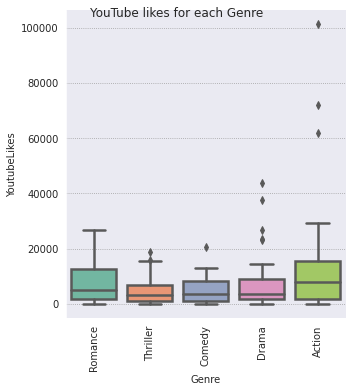

In [129]:

a=sns.catplot(x="Genre",y="YoutubeLikes",data=df_bolly,linewidth=2.5,kind="box",palette="Set2")
a.set_xticklabels(rotation=90)
a.fig.suptitle('YouTube likes for each Genre')

Inference: Clearly, the Action movies have the highest number of YoutubeLikes

**Q11**
:Which of the variables among 
Budget, BoxOfficeCollection, YoutubeView, YoutubeLikes, YoutubeDislikes are
highly correlated? Note: Draw pair plot or heatmap.

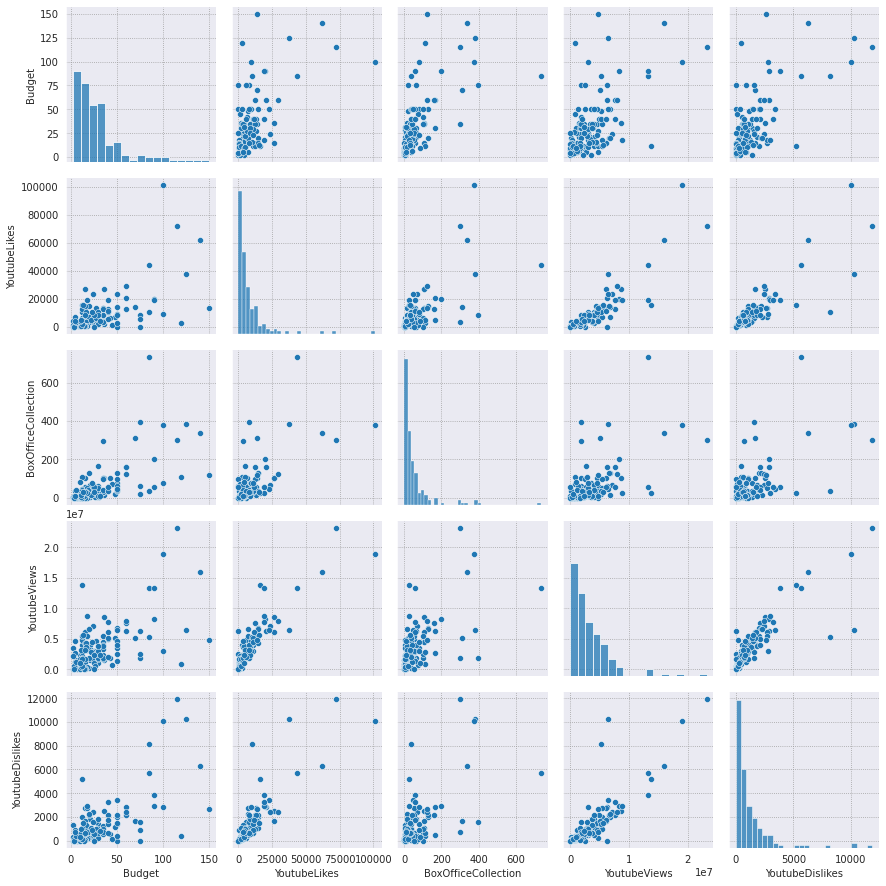

In [96]:

sns.pairplot(data=df_bolly,vars=["Budget","YoutubeLikes",
                                 "BoxOfficeCollection","YoutubeViews","YoutubeDislikes"])

In [97]:
df_bolly[["Budget","YoutubeLikes","BoxOfficeCollection","YoutubeViews","YoutubeDislikes"]].corr()

,Budget,YoutubeLikes,BoxOfficeCollection,YoutubeViews,YoutubeDislikes
Budget,1.000000,0.608916,0.650401,0.589038,0.665343
YoutubeLikes,0.608916,1.000000,0.682517,0.884055,0.859730
BoxOfficeCollection,0.650401,0.682517,1.000000,0.588632,0.623941
YoutubeViews,0.589038,0.884055,0.588632,1.000000,0.846739
YoutubeDislikes,0.665343,0.859730,0.623941,0.846739,1.000000


Inference: Among all the variables, YoutubeLikes and YoutubeViews are highly correlated, with a correlation of 0.884055.

**Q12**
: During 2013−2015 period, highlight the genre of movies and their box office 
collection? Visualize with best fit graph.


Text(0.5, 0.98, 'Genre Vs BoxOfficeCollection')

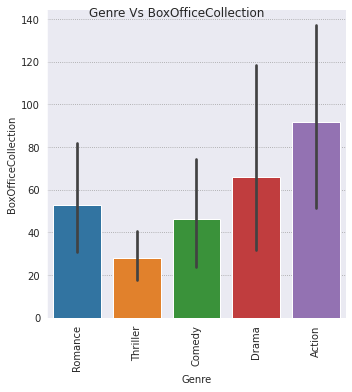

In [130]:
a=sns.catplot(data=df_bolly,x="Genre",y="BoxOfficeCollection",kind="bar")
a.set_xticklabels(rotation=90)
a.fig.suptitle("Genre Vs BoxOfficeCollection")

Inference: Action movies have the highest BoxOfficeCollection.

**Q13**
: Visualize the Budget and Box office collection based on Genre.

Text(0.5, 0.98, 'Genre Vs BoxOfficeCollection and Budget')

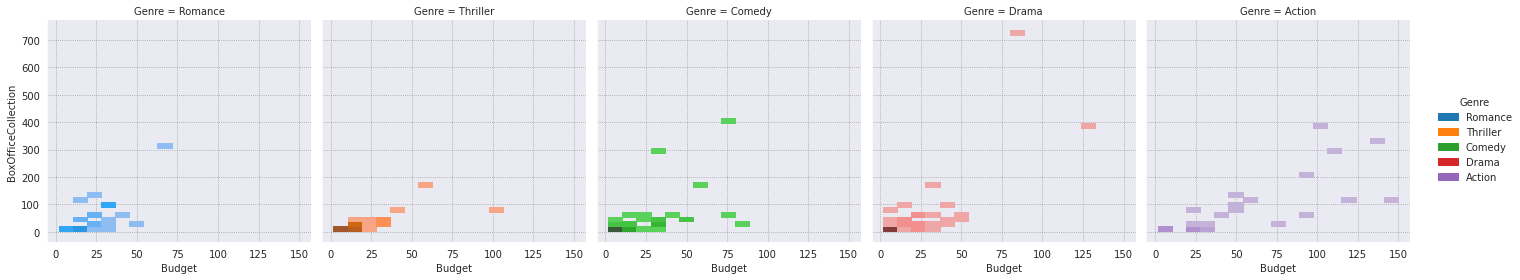

In [132]:
sns.displot(x="Budget",y="BoxOfficeCollection",kind="hist",
            data=df_bolly,hue="Genre",col="Genre", height=4, aspect=1)
a.fig.suptitle("Genre Vs BoxOfficeCollection and Budget")

Inference: The above displots display the Budget and 
Box office collection based on Genre.

**Q14**
:Find the distribution of movie budget for every Genre.

Text(0.5, 0.98, 'Genre Vs Budget')

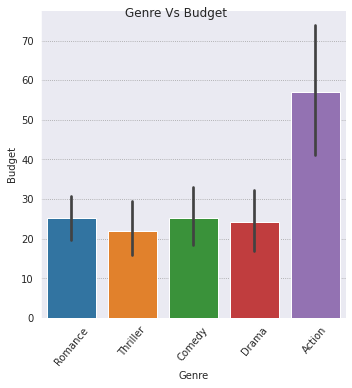

In [133]:
a=sns.catplot(x="Genre",y="Budget",data=df_bolly,kind="bar")
a.set_xticklabels(rotation=50)
a.fig.suptitle("Genre Vs Budget")

Inference: The movie Budget is highest for the Action movies.

Q15
:During 2013−2015, find the number of movies released in every year. Also, visualize 
with best fit graph.

In [112]:
df_bolly["year"]=pd.DatetimeIndex(df_bolly["Release Date"]).year  #extracting the "year" column
#df_bolly["year"].value_counts()
df_bolly[["year","Release Date"]].groupby("year").count()

,Release Date
year,
2013,67
2014,70
2015,12


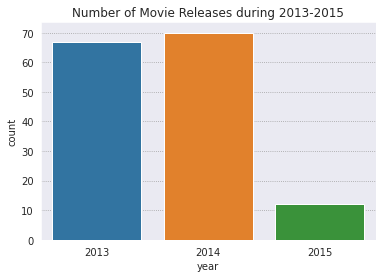

In [122]:
a=sns.countplot(x="year",data=df_bolly)
a.set_title("Number of Movie Releases during 2013-2015")
a.set_gid("darkgrid")

Inference: The maximum number of movie releases can be seen in the year-2014.